C:\Users\raul\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\raul\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\raul\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\raul\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:70: DeprecationWarning: Function

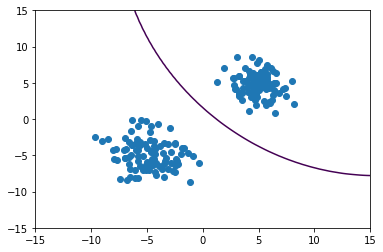

In [1]:
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[1])

from source import plotFunctions
from timeit import default_timer as timer
import numpy as np
import setup
from source import plotFunctions
from source import metrics
from methods import static_svm

import pylab as pl
from sklearn import mixture

%matplotlib inline
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from ipywidgets import interactive
from IPython.display import Audio, display



class Experiment():
    def __init__(self, method):
        #commom for all experiments
        self.method = method
        self.initialLabeledDataPerc=0.05
        #self.classes=[0, 1]
        self.usePCA=False
        #used only by gmm and cluster-label process
        self.densityFunction='gmm'
        self.excludingPercentage = 0.95
        self.K_variation = 5
        self.classifier='cluster_and_label'
        #used in alpha-shape version only
        self.CP=0.65
        self.alpha=0.5
        #used in kmeans_svm and compose only
        self.useSVM=False
        self.isImbalanced=False


def doExperiments(dataValues, dataLabels, datasetDescription, experiments, numberOfTimes, batches):
    listOfAccuracies = []
    listOfMethods = []
    sizeOfBatch = int(len(dataLabels)/batches)
    
    print(datasetDescription)
    print("{} batches of {} instances".format(batches, sizeOfBatch))
    print("\n\n")
    
    for name, e in experiments.items():
        CoreX = []
        CoreY = []
        elapsedTime = []
        accTotal = []
        accuracies=[]
        classes = list(set(dataLabels))#getting all possible classes existent in data
        e.sizeOfBatch = sizeOfBatch
        e.batches = batches
        e.dataLabels = dataLabels
        e.dataValues = dataValues
        e.clfName = 'rf'

        for i in range(numberOfTimes):
            start = timer()
            #accuracy per step
            algorithmName, accuracies, CoreX, CoreY = e.method.start(dataValues=e.dataValues, dataLabels=e.dataLabels, usePCA=e.usePCA, classes=classes, classifier=e.classifier, densityFunction=e.densityFunction, batches=e.batches, sizeOfBatch = e.sizeOfBatch, initialLabeledDataPerc=e.initialLabeledDataPerc, excludingPercentage=e.excludingPercentage, K_variation=e.K_variation, CP=e.CP, alpha=e.alpha, clfName=e.clfName , useSVM=e.useSVM, isImbalanced=e.isImbalanced)
            end = timer()
            averageAccuracy = np.mean(accuracies)

            #elapsed time per step
            elapsedTime.append(end - start)
            
            accTotal.append(averageAccuracy)
        
        listOfAccuracies.append(accuracies)
        listOfMethods.append(algorithmName)
        #print("Total of ", numberOfTimes, " experiment iterations with an average accuracy of ", np.mean(accTotal))
        print("Average execution time: ", np.mean(elapsedTime))
        metrics.finalEvaluation(accuracies, batches)
        #print data distribution in step t
        initial = (batches*sizeOfBatch)-sizeOfBatch
        final = initial + sizeOfBatch
        plotFunctions.plot(dataValues[initial:final], dataLabels[initial:final], CoreX, CoreY, batches)
        print("\n\n")
   
    plotFunctions.plotBoxplot(listOfAccuracies, listOfMethods)
        

def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    #sinthetic
    dataValues, dataLabels, description = setup.loadCDT(path, sep)
    '''dataValues, dataLabels, description = setup.loadCHT(path, sep)
    dataValues, dataLabels, description = setup.load2CDT(path, sep)
    dataValues, dataLabels, description = setup.load2CHT(path, sep)
    dataValues, dataLabels, description = setup.loadUG_2C_2D(path, sep)
    dataValues, dataLabels, description = setup.loadUG_2C_3D(path, sep)
    dataValues, dataLabels, description = setup.loadUG_2C_5D(path, sep)
    dataValues, dataLabels, description = setup.loadMG_2C_2D(path, sep)
    dataValues, dataLabels, description = setup.loadFG_2C_2D(path, sep)
    dataValues, dataLabels, description = setup.loadGEARS_2C_2D(path, sep)
    dataValues, dataLabels, description = setup.loadCSurr(path, sep)
    dataValues, dataLabels, description = setup.load5CVT(path, sep)
    dataValues, dataLabels, description = setup.load4CR(path, sep)
    dataValues, dataLabels, description = setup.load4CRE_V1(path, sep)
    dataValues, dataLabels, description = setup.load4CRE_V2(path, sep)
    dataValues, dataLabels, description = setup.load4CE1CF(path, sep)
    #real
    dataValues, dataLabels, description = setup.loadCheckerBoard(path, sep)
    dataValues, dataLabels, description = setup.loadNOAADataset(path, sep)
    dataValues, dataLabels, description = setup.loadKeystroke(path, sep)
    dataValues, dataLabels, description = setup.loadElecData(path, sep)'''
    
    '''  '''
    #experiments[1] = Experiment(static_svm)
    
    
    #running pywidget
    '''def run(batches):
        doExperiments(dataValues, dataLabels, description, experiments, 1, batches)
        
    v = interact(run, batches=(1, 100, 1));
    display(v)'''
    np.random.seed(0)
    C1 = np.array([[3, -2.7], [1.5, 2.7]])
    C2 = np.array([[1, 2.0], [-1.5, 1.7]])

    X_train = np.r_[
        np.random.multivariate_normal((-5, -5), C1, size=100),
        np.random.multivariate_normal((5, 5), C2, size=100),
    ]

    clf = mixture.GMM(n_components=2, covariance_type='full')
    clf.fit(X_train)

    #define g1(x, y) and g2(x, y)

    def g1(x, y):
        return clf.predict_proba(np.column_stack((x, y)))[:, 0]

    def g2(x, y):
        return clf.predict_proba(np.column_stack((x, y)))[:, 1]

    #plot code from here

    X, Y = np.mgrid[-15:15:100j, -15:15:100j]
    x = X.ravel()
    y = Y.ravel()

    p = (g1(x, y) - g2(x, y)).reshape(X.shape)

    pl.scatter(X_train[:, 0], X_train[:, 1])
    pl.contour(X, Y, p, levels=[0])

    
if __name__ == "__main__":
    main()